# Fashion MNIST Pre- trained weights

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

We are reading MNIST data from https://github.com/zalandoresearch/fashion-mnist)


In [5]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion',one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [6]:
print(fashion_mnist.train.num_examples) # Number of training data
print(fashion_mnist.test.num_examples) # Number of test data

55000
10000


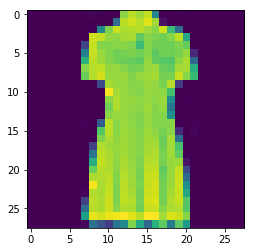

In [7]:
sample_1 = fashion_mnist.train.images[47].reshape(28,28)
plt.imshow(sample_1)

## Setting hyper-parameters

In [8]:
# architecture hyper-parameter
learning_rate = 0.01
training_iters = 100000
batch_size = 128
display_step = 20

n_input = 784 # 28x28 image
n_classes = 10 # 1 for each digit [0-9]
dropout = 0.75 

## Defining model using conv2d, Relu and Maxpooling

In [9]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [10]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [11]:
def conv_net(x, weights, biases, dropout):
    # reshape input to 28x28 size
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution layer 1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max pooling
    conv1 = maxpool2d(conv1, k=2)

    # Convolution layer 2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max pooling
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

## Initializing Weights and Biases

In [12]:

#writer = tf.summary.FileWriter("./logs/2.2")


#tf.reset_default_graph()



#g=tf.get_default_graph()

#v1 = tf.get_variable("v1", [3], initializer = tf.zeros_initializer)

#
#with tf.name_scope('restored_weights') as scope:
#biases = {
 #   'bc1': tf.Variable(tf.random_normal([32]),name='bc1'),
  #  'bc2': tf.Variable(tf.random_normal([64]),name='bc2'),
   # 'bd1': tf.Variable(tf.random_normal([1024]),name='bd1'),
    #'out': tf.Variable(tf.random_normal([n_classes]),name='b4')
# }

#with tf.Session(graph=g) as sess1:
            # Load model

        #saver = tf.train.import_meta_graph('check/model.ckpt.meta')    #
       # saver=tf.train.Saver(biases)
        #sess1.run(tf.global_variables_initializer())

       # saver.restore(sess1,"check/model.ckpt")

      
       # writer.add_graph(sess1.graph)

        # print(biases) 
  



In [13]:
writer = tf.summary.FileWriter("./logs/2")


tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)
print(x.shape, y.shape)

weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]),name='wc1'),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64]),name='wc2'),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024]),name="wd1"),
    'out': tf.Variable(tf.random_normal([1024, n_classes]),name="w4")
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32]),name='bc1'),
    'bc2': tf.Variable(tf.random_normal([64]),name='bc2'),
    'bd1': tf.Variable(tf.random_normal([1024]),name='bd1'),
    'out': tf.Variable(tf.random_normal([n_classes]),name='b4')
}
saver = tf.train.Saver()


with tf.Session() as sess1:
    # Load the weights and bias
    saver.restore(sess1,"check/model.ckpt")
    print('biases:')
    print(sess1.run(biases))
    writer.add_graph(sess1.graph)




(?, 784) (?, 10)
INFO:tensorflow:Restoring parameters from check/model.ckpt
biases:
{'out': array([ 1.8140063 , -1.3549004 , -0.6972118 , -0.03704418, -0.575428  ,
        1.1613044 ,  1.2955763 , -0.4012211 , -0.35322228, -0.6027212 ],
      dtype=float32), 'bc2': array([ 1.6188246e-01,  1.8329057e+00, -1.1416315e-01,  1.7724207e-01,
       -8.3075011e-01, -2.6711437e-01,  3.8837942e-01, -3.9513558e-01,
       -4.2339653e-01,  1.1462628e-01, -1.5952190e+00, -1.4591267e+00,
       -1.8177141e-01, -3.2456908e-01,  7.4565566e-01, -4.3686548e-01,
       -1.7489035e+00,  3.4718782e-01,  5.4944181e-01,  4.6394423e-01,
       -6.9039494e-01,  4.9477255e-01, -4.4093597e-01, -1.7258165e+00,
        6.5273494e-01,  1.9512705e-03, -9.0393674e-01, -9.3420136e-01,
        9.0186530e-01,  1.7082271e-01,  2.4077423e-01, -1.1224726e+00,
        8.2932150e-01, -4.0650907e-01, -1.5819722e+00, -5.6590515e-01,
       -2.9995006e-01, -9.6639067e-01,  3.2130635e-01, -2.1968207e+00,
        7.8072868e-02, -

## Define cost, optimizer and accuracy

In [14]:
# Create the model
model = conv_net(x, weights, biases, keep_prob)


# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_model = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_model, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

## Running the session 
This will run the graph and use all the tensors that were previously defined

In [18]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)   
        #print(batch_x.shape, batch_y.shape)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        if step % display_step == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Loss= " + \
                  "{:.3f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
        step += 1
    
    # Calculate accuracy for 256 mnist test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: fashion_mnist.test.images[:256],
                                      y: fashion_mnist.test.labels[:256],
                                      keep_prob: 1.}))

Iter 2560, Loss= 2473.970, Training Accuracy= 0.656
Iter 5120, Loss= 708.868, Training Accuracy= 0.711
Iter 7680, Loss= 335.930, Training Accuracy= 0.805
Iter 10240, Loss= 292.193, Training Accuracy= 0.812
Iter 12800, Loss= 429.062, Training Accuracy= 0.773
Iter 15360, Loss= 386.478, Training Accuracy= 0.781
Iter 17920, Loss= 190.115, Training Accuracy= 0.812
Iter 20480, Loss= 156.169, Training Accuracy= 0.836
Iter 23040, Loss= 228.950, Training Accuracy= 0.766
Iter 25600, Loss= 132.442, Training Accuracy= 0.812
Iter 28160, Loss= 98.211, Training Accuracy= 0.844
Iter 30720, Loss= 130.019, Training Accuracy= 0.766
Iter 33280, Loss= 148.222, Training Accuracy= 0.750
Iter 35840, Loss= 157.330, Training Accuracy= 0.789
Iter 38400, Loss= 112.429, Training Accuracy= 0.820
Iter 40960, Loss= 107.937, Training Accuracy= 0.789
Iter 43520, Loss= 94.833, Training Accuracy= 0.789
Iter 46080, Loss= 126.832, Training Accuracy= 0.719
Iter 48640, Loss= 81.217, Training Accuracy= 0.766
Iter 51200, Loss=

### The testing acccuracy has improved than the normal fashion_mnist after applying weights from the mnist data which yielded just 19.5% accuracy.The accuracy improved from 19.5% to 62.5 %.

In [ ]:
## Checking for the biases are same from checked point. 

In [16]:
from tensorflow.python.tools import inspect_checkpoint as chkp
chkp.print_tensors_in_checkpoint_file("check/model.ckpt",tensor_name='b4', all_tensors=False)


tensor_name:  b4
[ 1.8140063  -1.3549004  -0.6972118  -0.03704418 -0.575428    1.1613044
  1.2955763  -0.4012211  -0.35322228 -0.6027212 ]
